In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Datasets/BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
df.isnull().sum(axis=0)

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.shape

(506, 14)

In [8]:
cor= df.iloc[:,:13].corr()
cor

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


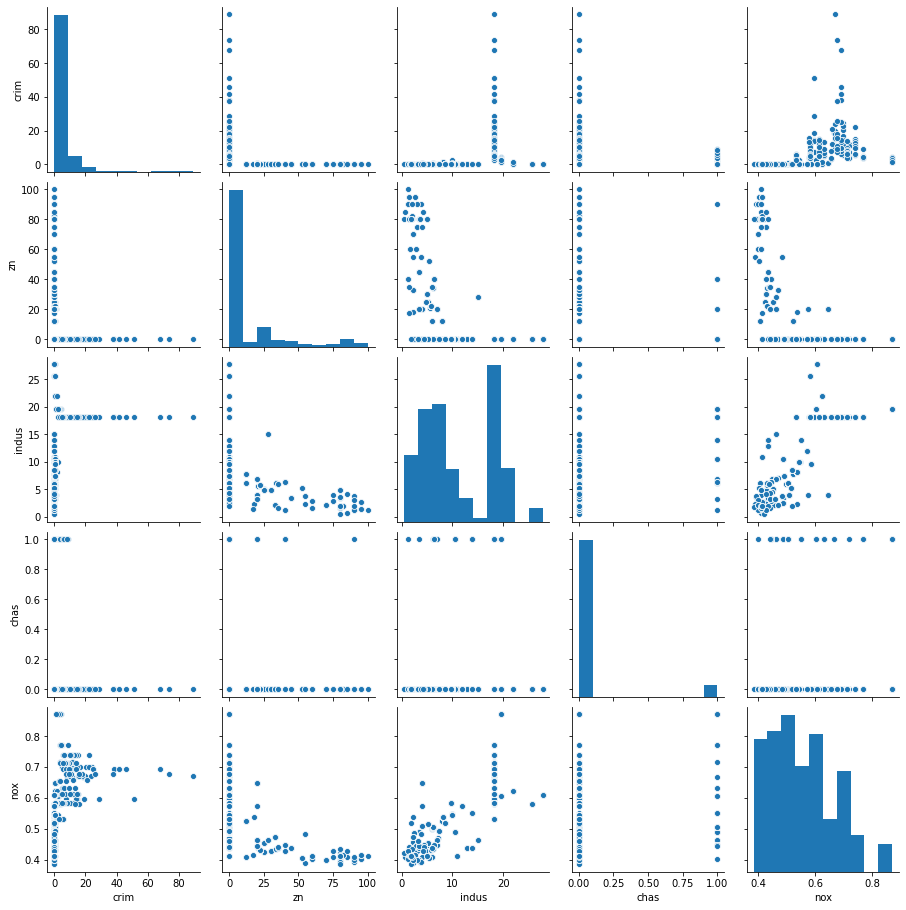

In [9]:
sns.pairplot(df.iloc[:,:5])

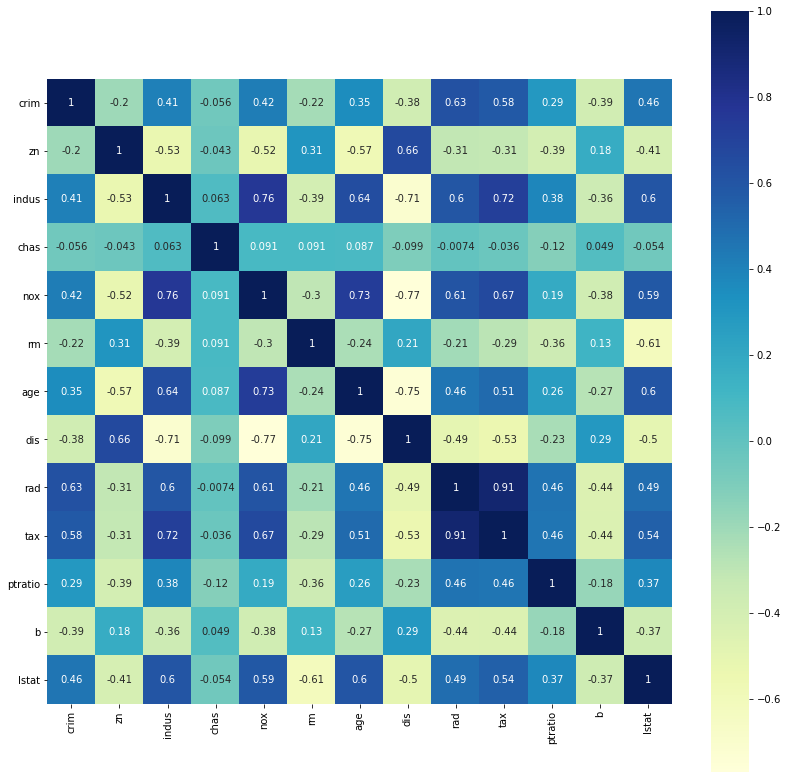

In [13]:
plt.figure(figsize=(14,14))
sns.heatmap(cor,square = True, cmap = "YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

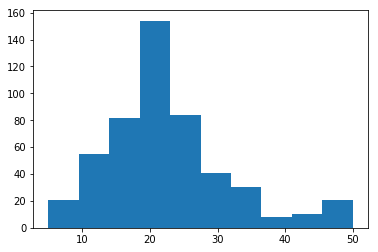

In [104]:
plt.hist(df['medv'])

In [105]:
df['logmedv'] = np.log(df['medv'])

In [ ]:
#df.head()

(array([  3.,   8.,  13.,  23.,  63., 100., 172.,  52.,  40.,  32.]),
 array([1.60943791, 1.83969642, 2.06995493, 2.30021344, 2.53047195,
        2.76073046, 2.99098897, 3.22124748, 3.45150599, 3.6817645 ,
        3.91202301]),
 <a list of 10 Patch objects>)

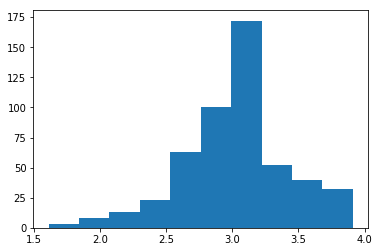

In [106]:
plt.hist(df.logmedv)

In [ ]:
df['sqrtmedv'] = np.sqrt(df['medv'])

In [ ]:
plt.hist(df.sqrtmedv)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df.shape

In [38]:
df1 = df.iloc[:,:13]

In [40]:
df1.head()

,crim,zn,indus,chas,dis,rad,lstat
0,0.00632,18.0,2.31,0,4.0900,1,4.98
1,0.02731,0.0,7.07,0,4.9671,2,9.14
2,0.02729,0.0,7.07,0,4.9671,2,4.03
3,0.03237,0.0,2.18,0,6.0622,3,2.94
4,0.06905,0.0,2.18,0,6.0622,3,5.33


In [41]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features'] = df1.columns

In [42]:
vif

,VIF,Features
0,2.067135,crim
1,2.299351,zn
2,6.900077,indus
3,1.086574,chas
4,3.968908,dis
5,4.678181,rad
6,6.726973,lstat


In [39]:
df1.drop(['ptratio','nox','tax','rm','age','b'],axis=1, inplace=True)

In [44]:
df1.head()

,crim,zn,indus,chas,dis,rad,lstat
0,0.00632,18.0,2.31,0,4.0900,1,4.98
1,0.02731,0.0,7.07,0,4.9671,2,9.14
2,0.02729,0.0,7.07,0,4.9671,2,4.03
3,0.03237,0.0,2.18,0,6.0622,3,2.94
4,0.06905,0.0,2.18,0,6.0622,3,5.33


In [ ]:
#df1.corr()

In [127]:
x = df1  ### Features
#y = df.medv  ### Labels
y = df.medv
y1 = df.logmedv

In [128]:
x

,crim,zn,indus,chas,dis,rad,lstat
0,0.00632,18.0,2.31,0,4.0900,1,4.98
1,0.02731,0.0,7.07,0,4.9671,2,9.14
2,0.02729,0.0,7.07,0,4.9671,2,4.03
3,0.03237,0.0,2.18,0,6.0622,3,2.94
4,0.06905,0.0,2.18,0,6.0622,3,5.33
...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,2.4786,1,9.67
502,0.04527,0.0,11.93,0,2.2875,1,9.08
503,0.06076,0.0,11.93,0,2.1675,1,5.64
504,0.10959,0.0,11.93,0,2.3889,1,6.48


In [129]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [159]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.2,random_state=4)

In [131]:
df1.shape

(506, 7)

In [132]:
x_train.head(10)

,crim,zn,indus,chas,dis,rad,lstat
192,0.08664,45.0,3.44,0,6.4798,5,2.87
138,0.24980,0.0,21.89,0,1.6686,4,21.32
251,0.21409,22.0,5.86,0,7.3967,7,3.59
13,0.62976,0.0,8.14,0,4.7075,4,8.26
256,0.01538,90.0,3.75,0,6.3361,3,3.11
299,0.05561,70.0,2.24,0,7.8278,5,4.74
180,0.06588,0.0,2.46,0,2.7410,3,7.56
92,0.04203,28.0,15.04,0,3.6659,4,8.16
219,0.11425,0.0,13.89,1,3.3633,5,10.50
152,1.12658,0.0,19.58,1,1.6102,5,12.12


In [133]:
x_test.shape

(102, 7)

In [134]:
lr = LinearRegression().fit(x_train,y_train)

In [135]:
lr.coef_

array([-0.10259921,  0.08922157, -0.31873335,  4.96917507, -1.87908649,
       -0.02286227, -0.81685057])

In [136]:
df1.columns

Index(['crim', 'zn', 'indus', 'chas', 'dis', 'rad', 'lstat'], dtype='object')

In [137]:
lr.intercept_

42.711279048106455

In [138]:
lr.score(x_test,y_test) # Coeffecient of determination  R^2

0.6176817512170039

In [139]:
lr.score(x_train,y_train)

0.6367237633857816

In [140]:
pred = lr.predict(x_test)

In [141]:
pred

array([ 5.30500342, 24.04026723, 18.88360393, 17.70013554, 31.91370613,
       23.7407372 , 29.96599453, 16.94081177, 16.00104726, 25.54222934,
       30.38148688, 28.52140545, 24.13480995, 33.32266044, 21.49716299,
       15.44375808, 18.65163866,  8.07568786, 14.06446903, 18.08232021,
        8.61827041, 20.18746083, 16.3496948 , 25.26108947, 17.58057495,
       23.76727147, 18.02637561, 16.85089857, 21.77090221, 20.45395342,
       14.42186722, 25.96855941, 29.93554282, 18.50240945, 18.08282648,
       15.48392309, 30.50104492, 30.977481  , 24.0377607 , 24.72061109,
       35.05479427, 28.95367711, 19.49382302, 31.30965379, 32.17566861,
       27.89080131, 36.5696431 , 14.36905653, 19.14480782, 22.07679327,
       35.84139829, 22.60666719, 15.73894086, 21.84803338, 16.99458237,
       25.79193107, 26.93889901, 33.68291791, 23.26004808, 38.56335081,
       18.69049784, 20.09530154, 33.19652685, 18.89710573, 35.08258864,
       28.54332903, 35.18474121,  7.3609763 , 16.91006755, 19.87

In [122]:
df1.head()

,crim,zn,indus,chas,dis,rad,lstat
0,0.00632,18.0,2.31,0,4.0900,1,4.98
1,0.02731,0.0,7.07,0,4.9671,2,9.14
2,0.02729,0.0,7.07,0,4.9671,2,4.03
3,0.03237,0.0,2.18,0,6.0622,3,2.94
4,0.06905,0.0,2.18,0,6.0622,3,5.33


In [142]:
x_test['pred'] = pred
x_test['actual'] = y_test

c:\users\shivu\anaconda3\envs\tensorflow1.5\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\shivu\anaconda3\envs\tensorflow1.5\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [143]:
x_test

,crim,zn,indus,chas,dis,rad,lstat,pred,actual
8,0.21124,12.5,7.87,0,6.0821,5,29.93,5.305003,16.5
289,0.04297,52.5,5.32,0,7.3172,6,9.51,24.040267,24.8
68,0.13554,12.5,6.07,0,6.4980,4,13.09,18.883604,17.4
211,0.37578,0.0,10.59,1,3.6650,4,23.98,17.700136,19.3
226,0.38214,0.0,6.20,0,3.2157,8,3.13,31.913706,37.6
...,...,...,...,...,...,...,...,...,...
368,4.89822,0.0,18.10,0,1.3325,24,3.26,30.724142,50.0
144,2.77974,0.0,19.58,0,1.3459,5,29.29,9.616354,11.8
336,0.03427,0.0,5.19,0,5.2311,5,9.80,23.104401,19.5
437,15.17720,0.0,18.10,0,1.9142,24,26.45,9.633697,8.7


In [144]:
y_test

8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
       ... 
368    50.0
144    11.8
336    19.5
437     8.7
216    23.3
Name: medv, Length: 102, dtype: float64

In [146]:
from sklearn import metrics
print ("MSE", metrics.mean_squared_error(y_test,pred))
print ("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred)))

MSE 35.51324557925377
RMSE 5.959299084561352


In [147]:
x_train, x_test, y_train, y_test =train_test_split(x,y1, test_size = 0.2,random_state=4)

In [148]:
lr1 = LinearRegression().fit(x_train,y_train)

In [149]:
lr1.coef_

array([-0.01084238,  0.00251928, -0.01177084,  0.17075618, -0.06050854,
       -0.0008313 , -0.03739548])

In [150]:
lr1.intercept_

3.872285141865026

In [151]:
lr1.score(x_test,y_test)

0.7019006105582026

In [156]:
pred1 = lr1.predict(x_test)
pred2= np.exp(pred1)

In [160]:
y_test

8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
       ... 
368    50.0
144    11.8
336    19.5
437     8.7
216    23.3
Name: medv, Length: 102, dtype: float64

In [157]:
pred2

array([10.14952598, 23.05974933, 19.00764011, 16.32146461, 32.35883267,
       23.79643426, 29.2029709 , 16.43496942, 14.21614249, 22.68738128,
       29.91199563, 27.40978217, 22.16976896, 32.46331428, 20.67819494,
       14.66445212, 18.77831768, 10.17804501, 11.95931987, 17.76252816,
        7.11232488, 18.6465506 , 16.2618473 , 23.56890799, 18.8990958 ,
       22.1584309 , 16.64993798, 16.38075781, 19.81426431, 18.8013735 ,
       13.97868213, 25.17956384, 27.55962593, 18.06487074, 16.56660461,
       14.24378849, 30.26973761, 31.14363047, 24.00256444, 24.88769935,
       35.11554167, 28.19518064, 17.19998122, 30.67496293, 30.66928628,
       25.72280304, 37.04365225, 15.46650239, 17.78773299, 21.5005659 ,
       35.79205612, 21.13392063, 14.53508663, 22.3892943 , 16.63390953,
       24.44485058, 25.6722933 , 33.90600408, 22.14403448, 39.87256933,
       18.10550472, 18.69286434, 32.87764455, 18.43651363, 35.65799656,
       27.59951021, 34.02122496,  9.44842124, 16.49121667, 19.34

In [154]:
pred1 = lr1.predict(x_test)
print ("MSE", metrics.mean_squared_error(y_test,pred2))
print ("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred2)))

MSE 423.76508464927844
RMSE 20.585555242676318


### using StatsModel API

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.api as sm

In [ ]:
df1.drop(['ptratio','nox','tax','rm','age','b'],axis=1, inplace=True)

In [25]:
model = smf.ols("medv ~ crim+chas+dis+zn+lstat+rm", data=df)
model_fit = model.fit()

In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          7.64e-121
Time:                        07:44:16   Log-Likelihood:                -1550.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     499   BIC:                             3144.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0121      3.298      1.823      0.069      -0.468      12.492
crim          -0.1381      0.031     -4.419      0.000      -0.200      -0.077
chas           3.4291      0.928      3.694      0.000       1.605       5.253
dis           -0.9893      0.166     -5.962      0.000      -1.315      -0.663
zn             0.0687      0.014      4.973      0.000       0.042       0.096
lstat         -0.6510      0.049    -13.213      0.000      -0.748      -0.554
rm             4.4543      0.433     10.288      0.000       3.604       5.305
==============================================================================
Omnibus:                      125.760   Durbin-Watson:                   0.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              380.501
Skew:                           1.167   Prob(JB):                     2.37e-83
Kurtosis:                       6.550   Cond. No.                         381.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

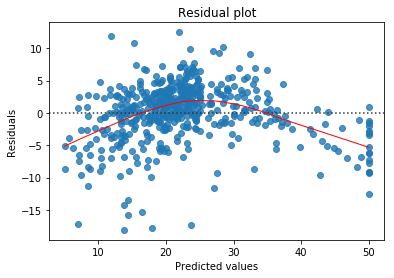

In [21]:
import seaborn as sns
# seaborn residual plot
sns.residplot(df['medv'],model_fitted_y, lowess=True, line_kws={'color':'r', 'lw':1})
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

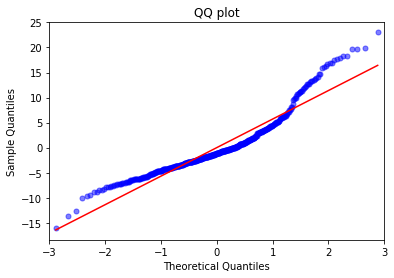

In [22]:
# statsmodels Q-Q plot on model residuals
QQ = ProbPlot(model_residuals)
fig = QQ.qqplot(alpha=0.5, markersize=5, line='s')
plt.title('QQ plot');

(array([  3.,   8.,  82., 203., 114.,  48.,  16.,  17.,  11.,   4.]),
 array([-15.95077751, -12.05104244,  -8.15130737,  -4.25157229,
         -0.35183722,   3.54789785,   7.44763292,  11.347368  ,
         15.24710307,  19.14683814,  23.04657321]),
 <a list of 10 Patch objects>)

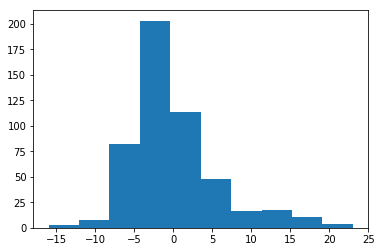

In [23]:
plt.hist(model_residuals)

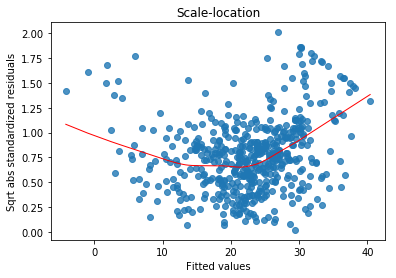

In [24]:
# plot scale-location
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True, line_kws={'color':'r', 'lw':1})
plt.xlabel('Fitted values')
plt.ylabel('Sqrt abs standardized residuals')
plt.title('Scale-location');

c:\users\shivu\anaconda3\envs\tensorflow1.5\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
c:\users\shivu\anaconda3\envs\tensorflow1.5\lib\site-packages\matplotlib\axes\_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


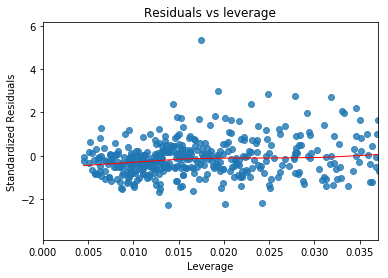

In [15]:
# plot residuals vs high leverage points
sns.regplot(model_leverage, model_norm_residuals, lowess=True, line_kws={'color':'r', 'lw':1})
plt.xlim(xmin=0, xmax=0.037)
plt.xlabel('Leverage')
plt.ylabel("Standardized Residuals")
plt.title("Residuals vs leverage");